In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from farmsize import data_prep, db_scan, mapping
from shapely.geometry import Point


In [5]:
ipums_terra = mapping.read_geo_csv("./data/ipums/processed/ipums_terra_merged.csv")
ipums_terra

,LABEL,GEOID,geometry,GEO2LABEL,GEO2,EDUCTERTIARY_GEO2A,EDUCSECOND_GEO2A,EDUCPRIMARY_GEO2A,EDUCLESSPRIM_GEO2A,SCHOOL0617_GEO2A,...,IGBP_CROPLAND_percent_area_bin_GEO2IGBP_2012_2012,IGBP_MXDFRST_percent_area_bin_GEO2IGBP_2012_2012,IGBP_BARREN_percent_area_bin_GEO2IGBP_2012_2012,IGBP_WATER_percent_area_bin_GEO2IGBP_2012_2012,IGBP_URBAN_percent_area_bin_GEO2IGBP_2012_2012,IGBP_num_classes_GEO2IGBP_2012_2012,IGBP_mode_GEO2IGBP_2012_2012,iso_2,year,id
0,Bazega,7002,"POLYGON ((-1.42011 12.13729, -1.41967 12.13224...",Bazega,7002,0.424409,1.307639,4.358798,93.587979,36.863700,...,8.503033,NaN,NaN,NaN,NaN,7.0,14.0,BF,2006,BF2006
1,Ziro,6044,"POLYGON ((-1.34575 11.59235, -1.34478 11.59103...",Ziro,6044,0.155575,1.089023,4.477096,91.547105,26.283230,...,6.732905,NaN,NaN,NaN,0.117129,8.0,14.0,BF,2006,BF2006
2,Sissili,6025,"POLYGON ((-2.26530 11.92486, -2.26233 11.90019...",Sissili,6025,0.274170,1.327561,7.099567,90.057720,27.986399,...,4.292361,NaN,NaN,NaN,0.086279,8.0,14.0,BF,2006,BF2006
3,Poni,13021,"POLYGON ((-2.99044 10.74717, -2.98872 10.74644...",Poni,13021,0.346784,1.986129,6.504834,90.037831,30.071733,...,3.725424,0.005666,NaN,NaN,0.050994,10.0,9.0,BF,2006,BF2006
4,Noumbiel,13041,"POLYGON ((-2.87542 10.19806, -2.86726 10.19766...",Noumbiel,13041,0.315831,1.500197,4.579550,92.538492,33.771744,...,2.942078,NaN,NaN,NaN,NaN,6.0,9.0,BF,2006,BF2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,Kyadondo,113003,"MULTIPOLYGON (((32.54187 0.27444, 32.54250 0.2...",Kyadondo,113003,6.053435,23.192377,78.271159,21.728841,85.420064,...,1.880531,0.110619,NaN,1.880531,6.489676,10.0,14.0,UG,2002,UG2002
1648,Bbaale,112001,"POLYGON ((32.93246 1.22514, 32.93764 1.21495, ...",Bbaale,112001,0.085179,1.845542,30.210108,69.789892,86.151685,...,0.995202,0.444286,0.017771,8.139328,NaN,13.0,14.0,UG,2002,UG2002
1649,Ntenjeru,112002,"POLYGON ((33.00215 0.87467, 33.00218 0.87463, ...",Ntenjeru,112002,0.410889,3.732238,44.615648,55.384352,85.999114,...,0.327332,0.122750,NaN,NaN,0.981997,7.0,14.0,UG,2002,UG2002
1650,Mawogola,111002,"POLYGON ((31.60022 0.05274, 31.59982 0.05228, ...",Mawogola,111002,0.191530,2.787827,31.283252,68.716748,79.544562,...,12.655747,0.014000,NaN,NaN,NaN,8.0,14.0,UG,2002,UG2002


In [6]:
country_mapping = data_prep.load_json("./data/country_mappings.json")

# Loading the administrative data
# ipums_level1 = gpd.read_file('./data/mapping/ipums/world_geolev1_2020/world_geolev1_2020.shp')
# ipums_level2 = gpd.read_file('./data/mapping/ipums/world_geolev2_2020/world_geolev2_2020.shp')

# Subsetting it to match the countries 
# ipums_level1 = ipums_level1.loc[ipums_level1["CNTRY_NAME"].isin(country_mapping["ipums"]),:]
ipums_terra = ipums_terra.loc[ipums_terra["iso_2"].isin(country_mapping["iso_2"]),:]

# Adding ISO country details
# ipums_level1 = ipums_level1.merge(country_mapping, left_on="CNTRY_NAME", right_on="ipums", how="left")
ipums_terra = ipums_terra.merge(country_mapping, left_on="iso_2", right_on="iso_2", how="left")

# Loading RHoMIS Indicators
indicator_data = pd.read_csv("./data/RHoMIS_Indicators.csv", encoding="latin")
countries_iso_2 = country_mapping["iso_2"].to_list()
indicator_data = data_prep.subset_data(indicator_data, complete_gps=True, countries=countries_iso_2) # Subsetting data bas

<AxesSubplot:>

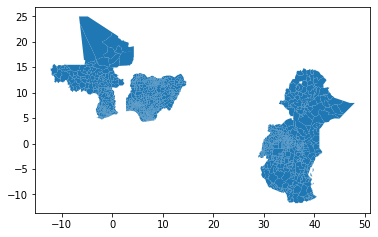

In [9]:
# World Shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [24]:
# Spatially joining the two datasets
indicator_data["geometry"] = [Point(xy) for xy in zip(indicator_data["GPS_LON"], indicator_data["GPS_LAT"])]
geo_indicator = gpd.GeoDataFrame(indicator_data)
geo_indicator = geo_indicator.sjoin(world, how="left", op="within")
geo_indicator = geo_indicator.rename(columns={"index_right":"index_world_shapefile"})
geo_indicator = geo_indicator.sjoin(ipums_terra, how="left", op="within")
geo_indicator = geo_indicator.rename(columns={"index_right":"index_ipums_terra"})



In [25]:
geo_indicator[]

,ID_PROJ,ID_COUNTRY,YEAR,ITERATION,SURVEY_ID,ID_HH,RHoMIS_ID,GPS_LAT,GPS_LON,GPS_ALT,...,IGBP_BARREN_percent_area_bin_GEO2IGBP_2012_2012,IGBP_WATER_percent_area_bin_GEO2IGBP_2012_2012,IGBP_URBAN_percent_area_bin_GEO2IGBP_2012_2012,IGBP_num_classes_GEO2IGBP_2012_2012,IGBP_mode_GEO2IGBP_2012_2012,iso_2,year,id,ipums,iso_3
0,ADN,BF,2019.0,1.0,BF_ADN_2019,BF_2019_ADN_1_1,BF_2019_ADN_1_1,11.19,-0.95,254.0,...,NaN,NaN,0.140940,9.0,14.0,BF,2006.0,BF2006,Burkina Faso,BFA
1,ADN,BF,2019.0,1.0,BF_ADN_2019,BF_2019_ADN_2_1,BF_2019_ADN_2_1,11.19,-0.95,346.0,...,NaN,NaN,0.140940,9.0,14.0,BF,2006.0,BF2006,Burkina Faso,BFA
2,ADN,BF,2019.0,1.0,BF_ADN_2019,BF_2019_ADN_3_1,BF_2019_ADN_3_1,11.19,-0.99,324.0,...,NaN,NaN,0.140940,9.0,14.0,BF,2006.0,BF2006,Burkina Faso,BFA
3,ADN,BF,2019.0,1.0,BF_ADN_2019,BF_2019_ADN_4_1,BF_2019_ADN_4_1,11.19,-0.99,326.0,...,NaN,NaN,0.140940,9.0,14.0,BF,2006.0,BF2006,Burkina Faso,BFA
4,ADN,BF,2019.0,1.0,BF_ADN_2019,BF_2019_ADN_5_1,BF_2019_ADN_5_1,11.22,-1.02,308.0,...,NaN,NaN,0.140940,9.0,14.0,BF,2006.0,BF2006,Burkina Faso,BFA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32830,NUT,UG,2020.0,1.0,UG_NUT_2020,UG_2020_NUT_179_1,UG_2020_NUT_179_1,1.44,31.32,1094.4,...,0.026535,37.236865,0.159208,12.0,14.0,UG,2002.0,UG2002,Uganda,UGA
32831,NUT,UG,2020.0,1.0,UG_NUT_2020,UG_2020_NUT_180_1,UG_2020_NUT_180_1,1.51,31.38,1190.1,...,0.026535,37.236865,0.159208,12.0,14.0,UG,2002.0,UG2002,Uganda,UGA
32832,NUT,UG,2020.0,1.0,UG_NUT_2020,UG_2020_NUT_181_1,UG_2020_NUT_181_1,1.51,31.39,1175.9,...,0.026535,37.236865,0.159208,12.0,14.0,UG,2002.0,UG2002,Uganda,UGA
32833,NUT,UG,2020.0,1.0,UG_NUT_2020,UG_2020_NUT_182_1,UG_2020_NUT_182_1,1.52,31.39,1170.3,...,0.026535,37.236865,0.159208,12.0,14.0,UG,2002.0,UG2002,Uganda,UGA


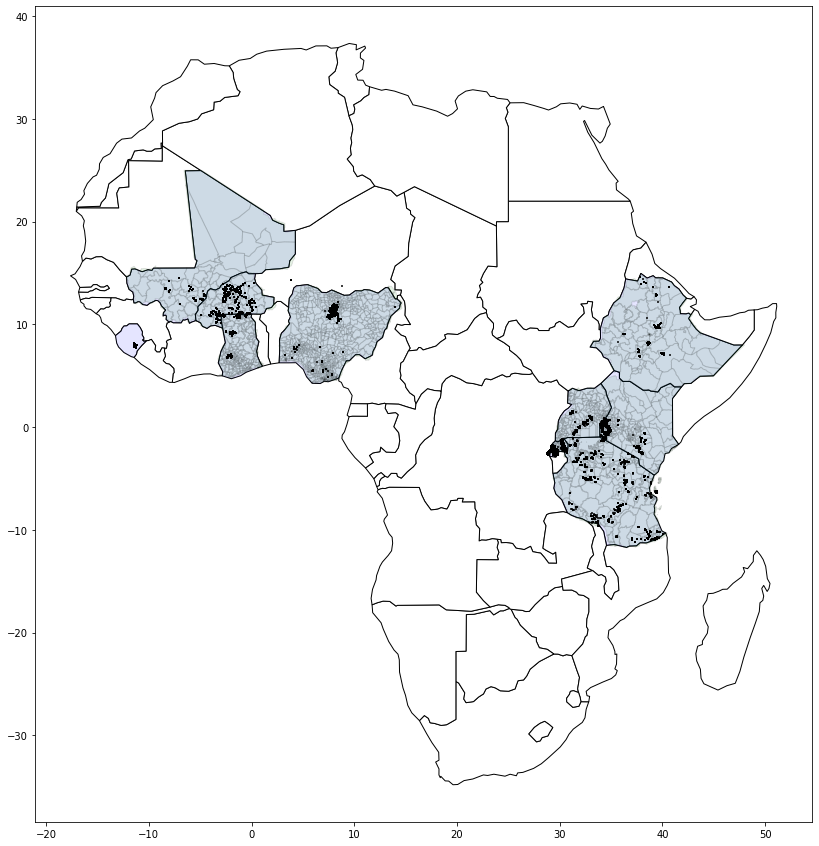

In [13]:
# Plot the points on a map
#same as
#fig= plt.figure()
#ax=fig.add_subplot()
fig, ax =  plt.subplots(figsize=(15,15))
ax.set_aspect('equal')
#Plot map layer
world.loc[world["continent"]=="Africa",].plot(ax=ax,color="white", edgecolor="black")

world.loc[world["iso_a3"].isin(country_mapping["iso_3"]),].plot(ax=ax,color="blue", edgecolor="black", alpha=0.1)
ipums_terra.plot(ax=ax, color="green", edgecolor="black", alpha=0.1)
#Plot Points
geo_indicator.plot(ax=ax, marker=0, color='black', markersize=5)

fig.show()
fig.savefig('./outputs/exploratory/map.png')


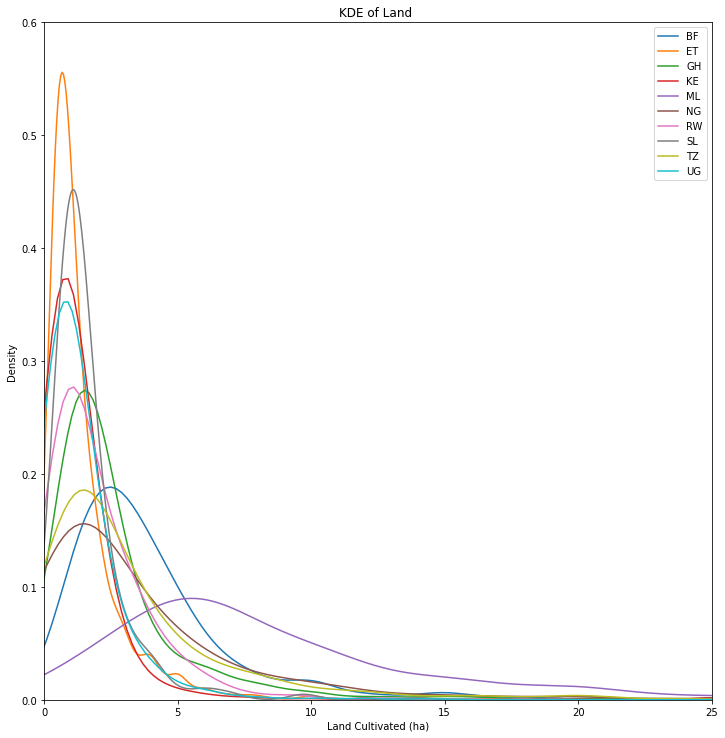

In [14]:
# Grouping by 
row_subsets = indicator_data["LandCultivated"].notna() & indicator_data["LandCultivated"].between(0.05,100)
column_subsets= ["ID_COUNTRY", "LandCultivated"]
grouping="ID_COUNTRY"

fig, ax = plt.subplots(figsize=(10,10))
plt.tight_layout()
ax.set_title("KDE of Land ")
ax.set_xlabel("Land Cultivated (ha)")
ax.set_ylabel("Density")
ax.set_xlim([0,25])
ax.set_ylim([0,0.6])
indicator_data.loc[row_subsets,:].groupby("ID_COUNTRY")["LandCultivated"].plot(kind="kde", ax=ax, legend=True)
fig.savefig("./outputs/exploratory/land_size_kde_all_countries.png", bbox_inches="tight")

# Clustering Households Spatially

In [ ]:
cluster_labels = db_scan.cluster_gps_points(indicator_data, "GPS_LON", "GPS_LAT", epsilon=0.1)